<a href="https://colab.research.google.com/github/markofthegrim/Auto-Brand-Detection/blob/main/Car_Brand_Detection_Resnet50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Model, Sequential
from keras.layers import Flatten,Dense,Dropout,Softmax

In [8]:
train_path = "/content/drive/MyDrive/Datasets/Car_Brand_Detection/Images/Train"
test_path = "/content/drive/MyDrive/Datasets/Car_Brand_Detection/Images/Test"


In [9]:
train_datagen = ImageDataGenerator(rescale = 1/255)                      
test_datagen = ImageDataGenerator(rescale = 1/255)

train = train_datagen.flow_from_directory(train_path, target_size = (224,224))
test = test_datagen.flow_from_directory(test_path, target_size = (224,224))


Found 64 images belonging to 3 classes.
Found 58 images belonging to 3 classes.


In [1]:
from keras.applications.resnet import ResNet50

In [10]:
resnet = ResNet50(include_top=False, weights='imagenet', input_shape= [224,224,3])

for layers in resnet.layers:
    layers.trainable = False

x = Flatten()(resnet.output)

prediction = Dense(3, activation='softmax')(x)

model = Model(inputs = resnet.input, outputs = prediction)

In [11]:
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_3 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_3[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                            

In [12]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

In [15]:
r = model.fit(train, validation_data=test,
          steps_per_epoch=2,
          epochs=25, 
          validation_steps=2)

Epoch 1/25
2/2 [==============================] - 38s 30s/step - loss: 5.1523 - accuracy: 0.3281 - val_loss: 7.8810 - val_accuracy: 0.5172
Epoch 2/25
2/2 [==============================] - 17s 13s/step - loss: 10.8419 - accuracy: 0.3281 - val_loss: 7.9198 - val_accuracy: 0.3276
Epoch 3/25
2/2 [==============================] - 18s 13s/step - loss: 9.4089 - accuracy: 0.3906 - val_loss: 4.9838 - val_accuracy: 0.3276
Epoch 4/25
2/2 [==============================] - 17s 13s/step - loss: 3.9515 - accuracy: 0.3906 - val_loss: 7.0737 - val_accuracy: 0.1552
Epoch 5/25
2/2 [==============================] - 18s 13s/step - loss: 4.7667 - accuracy: 0.3594 - val_loss: 4.5741 - val_accuracy: 0.5172
Epoch 6/25
2/2 [==============================] - 17s 13s/step - loss: 4.3359 - accuracy: 0.3594 - val_loss: 3.3183 - val_accuracy: 0.5172
Epoch 7/25
2/2 [==============================] - 17s 13s/step - loss: 1.6305 - accuracy: 0.5938 - val_loss: 2.2917 - val_accuracy: 0.3621
Epoch 8/25
2/2 [==========

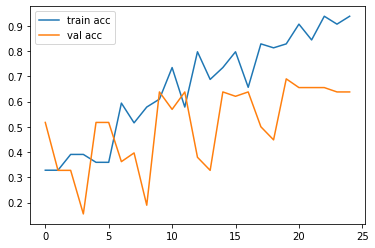

In [16]:
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

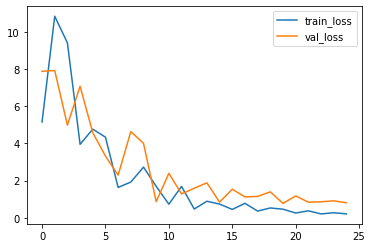

In [19]:
plt.plot(r.history['loss'],label = 'train_loss')
plt.plot(r.history['val_loss'],label = 'val_loss')
plt.legend()
plt.show()


In [20]:
from tensorflow.keras.models import load_model
model.save('model_resnet50.h5')


/usr/local/lib/python3.7/dist-packages/keras/engine/functional.py:1410: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  layer_config = serialize_layer_fn(layer)


In [21]:
y_pred = model.predict(test)

In [22]:
y_pred

array([[1.76218212e-01, 7.47119665e-01, 7.66621083e-02],
       [1.39667362e-01, 2.02912033e-01, 6.57420576e-01],
       [2.25748390e-01, 4.39354241e-01, 3.34897339e-01],
       [4.97182965e-01, 3.79360527e-01, 1.23456493e-01],
       [3.53051373e-03, 1.68683368e-03, 9.94782627e-01],
       [5.38458347e-01, 4.54775512e-01, 6.76610693e-03],
       [4.53129262e-01, 9.83290672e-02, 4.48541731e-01],
       [5.57015371e-03, 9.87179458e-01, 7.25034997e-03],
       [3.38822193e-02, 8.86486232e-01, 7.96315745e-02],
       [3.21163237e-02, 9.17789280e-01, 5.00943251e-02],
       [5.07944047e-01, 4.55575436e-01, 3.64805125e-02],
       [3.77428651e-01, 4.07573581e-01, 2.14997724e-01],
       [1.89163741e-02, 9.50403929e-01, 3.06797344e-02],
       [7.02332258e-02, 9.12250459e-01, 1.75163522e-02],
       [9.36440408e-01, 2.50991192e-02, 3.84605266e-02],
       [1.92526489e-01, 2.83936113e-01, 5.23537457e-01],
       [4.77667361e-01, 3.80709976e-01, 1.41622677e-01],
       [4.83495831e-01, 4.51664

In [23]:
y_pred = np.argmax(y_pred, axis=1)

In [24]:
y_pred

array([1, 2, 1, 0, 2, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 2, 0, 0, 1, 1, 2, 1,
       1, 0, 1, 2, 0, 1, 1, 1, 1, 0, 1, 1, 2, 1, 1, 1, 2, 1, 2, 2, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0])

In [47]:
from keras.preprocessing import image
img = image.load_img('/content/drive/MyDrive/Datasets/Car_Brand_Detection/Images/Test/audi/22.jpg', target_size = (224,224))

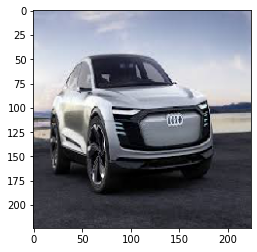

In [48]:
plt.imshow(img)

In [49]:
img_predict = image.img_to_array(img)
img_predict = img_predict/255

img_predict=np.expand_dims(img_predict,axis=0)


In [50]:
preds = model.predict(img_predict)
preds=np.argmax(preds, axis=1)
if preds==0:
  preds="The Car IS Audi"
elif preds==1:
  preds="The Car is Lamborghini"
else:
  preds="The Car Is Mercedes"
print(preds)

The Car IS Audi
